In [2]:
from load_sim_data import *
from load_shp import *
from sim_eval_pkg import *

Updated on 2025-10-14


___

### Figure 8

___

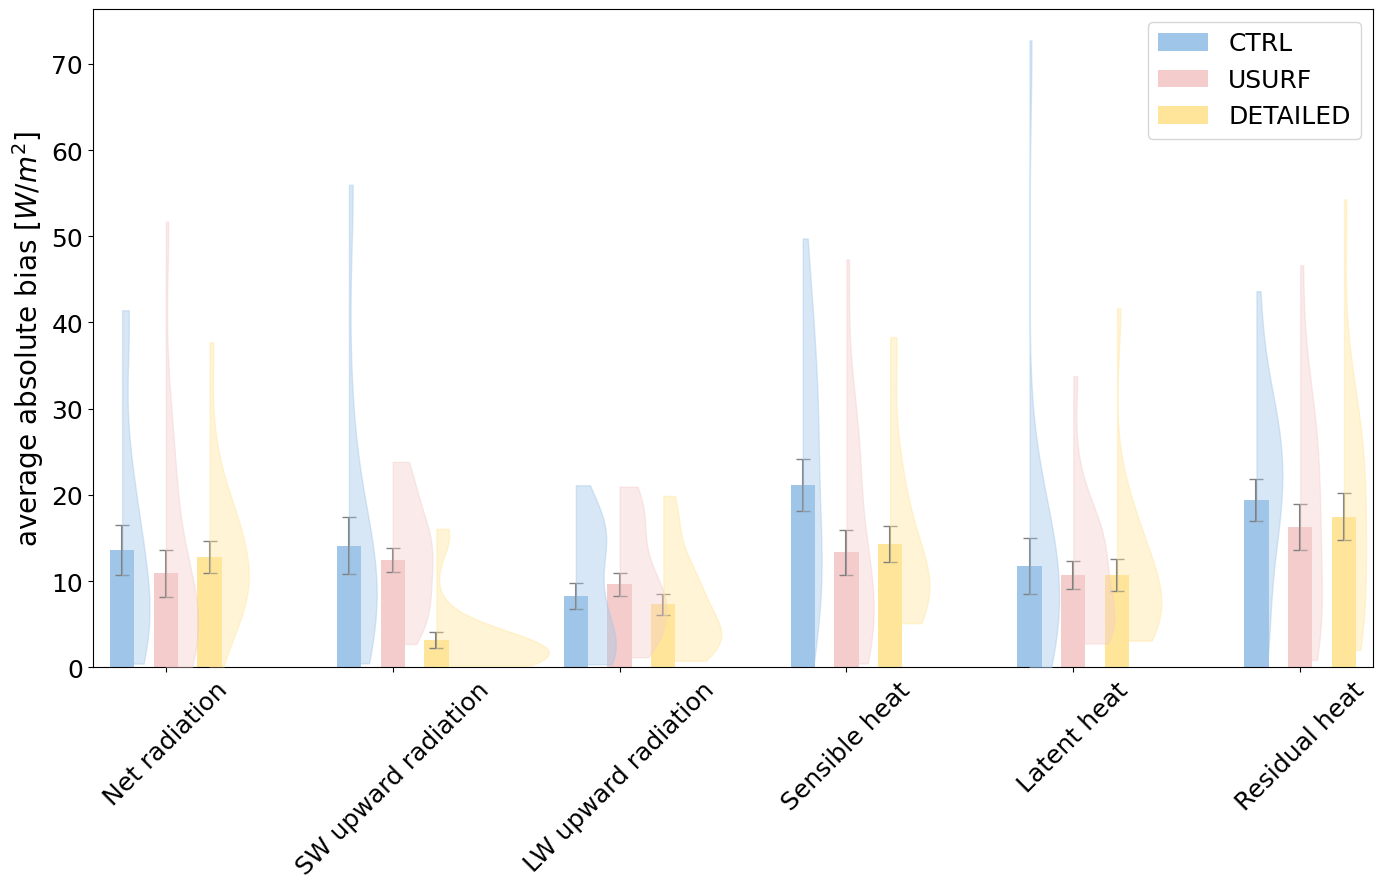

In [9]:
fig, ax = plt.subplots(figsize=(14, 9))

bar_width = 0.3
positions = np.arange(len(ctrl_mae))*2.8
space_scaler = 1.8

x_ctrl = positions - space_scaler*bar_width
x_test = positions
x_det  = positions + space_scaler*bar_width

ax.bar(x_ctrl, list(ctrl_mae), 
       yerr=list(ctrl_se), 
       capsize=5, 
       width=bar_width, 
       ecolor='grey',
       color='#9fc5e8', 
       label='CTRL',
       zorder=1)

ax.bar(x_test, list(test_mae), 
       yerr=list(test_se), 
       capsize=5, 
       width=bar_width, 
       ecolor='grey',
       color='#f4cccc', 
       label='USURF',
       zorder=1)

ax.bar(x_det, list(detailed_mae), 
       yerr=list(detailed_se), 
       capsize=5, 
       width=bar_width, 
       ecolor='grey',
       color='#ffe599', 
       label='DETAILED',
       zorder=1)

def plot_kde_at_position(data, position, color, zorder, alpha=0.4, scale=10):
    if len(data) > 1:  
        kde = stats.gaussian_kde(data)
        y_range = np.linspace(min(data), max(data), 100)
        density = kde(y_range)
        density_scaled = density * scale
        #ax.plot(density_scaled + position, y_range, color=color, linewidth=2, zorder=zorder)
        ax.fill_betweenx(y_range, 
                        position, 
                        density_scaled + position, 
                        alpha=alpha, 
                        color=color,
                        zorder=zorder)

variables = ['Q*', 'SWup', 'LWup', 'Qh', 'Qle', 'Qs']

for i, var in enumerate(variables):
    sites_bias=pd.read_csv(f'/glade/work/yifanc17/02_data/03_urban_plumber/YC_{var}_bias_c250325.csv',header=0)
    ctrl_data = np.abs(sites_bias['ctrl'].values)
    test_data = np.abs(sites_bias['test'].values)
    detailed_data = np.abs(sites_bias['detailed'].values)
    ctrl_data = ctrl_data[~np.isnan(ctrl_data)]
    test_data = test_data[~np.isnan(test_data)]
    detailed_data = detailed_data[~np.isnan(detailed_data)]
    
    plot_kde_at_position(ctrl_data, x_ctrl[i], '#9fc5e8',3)
    plot_kde_at_position(test_data, x_test[i], '#f4cccc',3)
    plot_kde_at_position(detailed_data, x_det[i], '#ffe599',3)


ax.set_xticks(positions)
ax.set_xticklabels(["Net radiation",
        "SW upward radiation",
        "LW upward radiation",
        "Sensible heat",
        "Latent heat",
        "Residual heat",], fontsize=18, rotation=45)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('average absolute bias [$W/m^2$]', fontsize=20)

plt.legend(prop={'size': 18}, loc='upper right')

pad = 0.9
ax.set_xlim(positions[0] - pad, positions[-1] + pad)

fig.tight_layout()
plt.show()